# Project-1: Solving Reaction-Diffusion Systems in the Persuit of Turing Patterns 

What is our goal? 

The goal of this project is to solve reaction-diffusion systems. We will use the Brusselator model as an example. Many other examples of similar models, however, do exist. The Brusselator model is a model for two species that can be formulated in three ways. First, as a system of two coupled ordinary differential equations. Secondly as a systems of two coupled partial differential equations in one dimension (x). And finally as a systems of two coupled partial differential equations in two dimensions (x and y). Examples of an implementations include [as ODE](https://en.wikipedia.org/wiki/Brusselator) and as PDE in two dimensions [in Python using py-pde](https://py-pde.readthedocs.io/en/latest/examples_gallery/pde_brusselator_expression.html) and  [in Julia using DifferentialEquations.jl](https://diffeq.sciml.ai/stable/tutorials/advanced_ode_example/).  We expect to recover Turing patterns in the numerical solution as shown on the above wiki page. 

The goal of this project is to reproduce the above examples, understand the implementation, understand the numerical solution obtained and extend the Brusselator model to other examples (variation of the same homework assignment). 

Relevant component of ANM-2021 include the spatial discretization of the 1D and 2D diffusion equation, the linearization of the non-linear terms and the implicit methods for time integration.  

We expect to go through the following stages: 
1. spatial discretization of the linear diffusion operator using second order central finite differences on uniform meshes in 1D and 2D subject to various boundary conditions; 
2. spatial discretization of the non-linear reaction terms by collocation;
3. linearization by computating exact Jacobians (or otherwise);
4. implicit time integration using a variable time step set by imposing the accuracy of the time integration (settings for atol and rtol);

## Import Libraries

In [1]:
import numpy as np
print("Succesfully imported %s -- Version: %s"%(np.__name__,np.__version__))
import scipy
print("Succesfully imported %s -- Version: %s"%(scipy.__name__,scipy.__version__))
import matplotlib.pyplot as plt
print("Succesfully imported %s"%plt.__name__)
import pandas as pd
print("Succesfully imported %s -- Version: %s"%(pd.__name__,pd.__version__))
import sympy as sym 
print("Succesfully imported %s -- Version: %s"%(sym.__name__,sym.__version__))
from scipy import optimize
print("Succesfully imported %s"%optimize.__name__)
from scipy.optimize import fsolve
print("Succesfully imported %s"%fsolve.__name__)
from scipy.signal import find_peaks
print("Succesfully imported %s"%find_peaks.__name__)
from scipy.linalg import orth
print("Succesfully imported %s"%orth.__name__)
from scipy.integrate import odeint
print("Succesfully imported %s"%odeint.__name__)

Succesfully imported numpy -- Version: 1.20.1
Succesfully imported scipy -- Version: 1.6.2
Succesfully imported matplotlib.pyplot
Succesfully imported pandas -- Version: 1.2.4
Succesfully imported sympy -- Version: 1.8
Succesfully imported scipy.optimize
Succesfully imported fsolve
Succesfully imported find_peaks
Succesfully imported orth
Succesfully imported odeint


## Section 1/: Introduction and Model Description

Describe the Brusselator model as ODE (see wiki), a PDE in one spatial dimensions [see here](https://rveltz.github.io/BifurcationKit.jl/dev/tutorials/tutorials3/#d-Brusselator-(automatic)) (possiby better references do exist) and as PDE in two spatial dimensions (see above, and book by Hairer and Wannes Part 2).  

## Section 2/: Brusselator model as ODE 

Work out the two examples on wiki using implicit time integration. Give physical interpretation. 

### Section 1.2/: Example of solving an ODE (to be adapted to Brusselator)

The example that follows was taken from the [numpy manual](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html#scipy.integrate.odeint). 

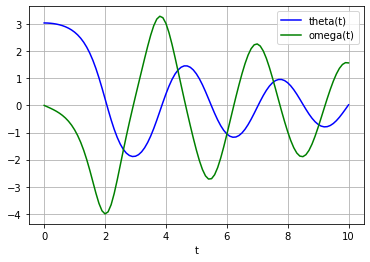

In [6]:
#..set rhs-function of ODE system 
>>> def pend(y, t, b, c):
...     theta, omega = y
...     dydt = [omega, -b*omega - c*np.sin(theta)]
...     return dydt

#..set parameter values 
b=.25; c= 5.0;

#..set initial conditions 
y0 = [np.pi - 0.1, 0.0];

#..set time interval 
t = np.linspace(0, 10, 101);

#..solve ODE systemk 
sol = odeint(pend, y0, t, args=(b, c), full_output=1, printmessg=0);

#..plot solution obtained 
plt.plot(t, sol[0][:, 0], 'b', label='theta(t)')
plt.plot(t, sol[0][:, 1], 'g', label='omega(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

## Section 3/: Brusselator model as PDE in 1D 

Add non-linear terms to two copies of the Poisson-1D matrix (see ANM-2021 Python introduction), perform implicit time integration. Domenico is not sure on how to extend the heat equation model from ANN-2021 to a transport model with two species.  

### Section 1.3/: Diffusion Matrix  

In [9]:
N = 4; h=1/N; h2=h*h; xvec = np.linspace(0,1,N+1);
e = np.ones(N+1); 
A = np.diag(-e[:-1],k=1)+np.diag(2*e)+np.diag(-e[:-1],k=-1); # tridiagonal matrix 
A = (1/h2)*A; 
A[0][0]=1; A[0][1]=0;     # handling left-most boundary condition 
A[-1][-1]=2/h2; A[-1][-2]=-2/h2; # handling right-most Neumann boundary condition 
#A[-1][-1]=1; A[-1][-2]=0; # handling right-most Dirichlet boundary condition
print(A); #print(xvec)

[[  1.   0.   0.   0.   0.]
 [-16.  32. -16.   0.   0.]
 [  0. -16.  32. -16.   0.]
 [  0.   0. -16.  32. -16.]
 [  0.   0.   0. -32.  32.]]


## Section 4/: Brusselator model as PDE in 2D 

Add non-linear terms to two copies of the Poisson-2D matrix (see ANM-2021 Python introduction), perform implicit time integration. 

## Section 5/: Other Models 

Repeat above for Fisher equation, Kolmogorov-Petrovsky-Piskunov equation, Oregonator model, Schnakenberg model, Gray-Scott model and FitzHugh–Nagumo model; 

## References 

To be extended. 

Ref-1: Guiu-Souto, Jacobo, et al. "Manipulation of diffusion coefficients via periodic vertical forcing controls the mechanism of Turing pattern formation." Physical Review E 82.6 (2010): 066209 [https://journals.aps.org/pre/pdf/10.1103/PhysRevE.82.066209?casa_token=StWd8LAlg18AAAAA%3AVcXU45U2oSxFH8C4juSzSK2PsMNAEcZ3BvqrpdqF9NUXjJPL5H5NuTTGZ0MZsZrsAoxIAu21NjX0]

Ref-2: Guiu-Souto, Jacobo, Jorge Carballido-Landeira, and Alberto P. Munuzuri. "Characterizing topological transitions in a Turing-pattern-forming reaction-diffusion system." Physical Review E 85.5 (2012): 056205. [https://journals.aps.org/pre/abstract/10.1103/PhysRevE.85.056205]